<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#How-To-Use" data-toc-modified-id="How-To-Use-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>How To Use</a></span></li><li><span><a href="#Synchronize-Behavior-Events-from-Phenosys-with-Recorded-Events-from-Neuron" data-toc-modified-id="Synchronize-Behavior-Events-from-Phenosys-with-Recorded-Events-from-Neuron-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Synchronize Behavior Events from Phenosys with Recorded Events from Neuron</a></span></li><li><span><a href="#Backup-->-moved-to-sync-class" data-toc-modified-id="Backup-->-moved-to-sync-class-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Backup -&gt; moved to sync class</a></span><ul class="toc-item"><li><span><a href="#Separate-in-Trials" data-toc-modified-id="Separate-in-Trials-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Separate in Trials</a></span><ul class="toc-item"><li><span><a href="#Load-Neuron-Files-&amp;-get-TTL-Signals-->-moved-to-sync-class-✔" data-toc-modified-id="Load-Neuron-Files-&amp;-get-TTL-Signals-->-moved-to-sync-class-✔-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Load Neuron Files &amp; get TTL Signals -&gt; moved to sync class ✔</a></span></li><li><span><a href="#Load-CSV-File-->-moved-to-sync-class-✔" data-toc-modified-id="Load-CSV-File-->-moved-to-sync-class-✔-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Load CSV File -&gt; moved to sync class ✔</a></span></li></ul></li><li><span><a href="#align-timestamps-with-Neuron-Sampling-Rate-" data-toc-modified-id="align-timestamps-with-Neuron-Sampling-Rate--3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>align timestamps with Neuron Sampling Rate </a></span><ul class="toc-item"><li><span><a href="#Convert-to-length" data-toc-modified-id="Convert-to-length-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Convert to length</a></span></li></ul></li><li><span><a href="#Align-Neuron-TTL-and-Phenosys" data-toc-modified-id="Align-Neuron-TTL-and-Phenosys-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Align Neuron TTL and Phenosys</a></span></li><li><span><a href="#Combine-DataFrames" data-toc-modified-id="Combine-DataFrames-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Combine DataFrames</a></span></li></ul></li></ul></div>

---

# How To Use

**1. define session & folder -> must be name of folder in parent folder with all behavior data**
    - folder/session/electrophysiology/digitalin.dat
    
**2. prepare csv from Phenosys**
    - partent/session/behavior/output.csv
    - example included in repository
    - headers: DateTime,SystemMsg,probability,gambl side
    - all other columns must be deleted

**3. create sync object** 
    - sync_obj = Sync(session, folder, number_of_ttl_channels_in_ditialin.dat, channel_with_information(default=1))

**4. investigate ttl signal and how it is overlapping with csv output (1.3)**

**5. create combined dataframe & separated trials**



---

# Synchronize Behavior Events from Phenosys with Recorded Events from Neuron
There are two methods available,
first finiding the best fit of consequitive trials in the Neuron Event list by comparing timestamps to the Phenosys Event list
second (an also to varify the accuracy of the first method each single event withouth paying attantion to consequitive trials is compared from Neuron list to Phenosys list and then complete trials are recronstructed from these

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import scipy.stats as st
import importlib
import os
import sys
import platform
import qgrid
import datetime
from scipy.interpolate import make_interp_spline, BSpline


from sync_class import SyncPhenosys


pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

%matplotlib notebook

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
session = 'JG14_190621'

# load calss and set folder depending on platform
if platform.system() == 'Linux':
    # Linux
    os.chdir("/home/max/ExpanDrive/Google Drive/3.1 Code Repository/1.4-klausbergerlab-sync/")
    from sync_class import Sync
    folder = "/home/max/ExpanDrive/Google Drive/3 Projekte/Masterarbeit Laborarbeit Neuroscience/1 Data Analysis"+'/'+session
elif platform.system() == 'Windows':
    # windows
    os.chdir(r"C:\Users\User\Google Drive\3.1 Code Repository\1.4-klausbergerlab-sync")
    from sync_class import Sync
    folder = r"C:/Users/User/Google Drive/3 Projekte/Masterarbeit Laborarbeit Neuroscience/1 Data Analysis"+ r"/" + session
elif platform.system() == 'Darwin':
    os.chdir("/Users/max/Google Drive/3.1 Code Repository/3 Masterarbeit/Spikes")
    from spikes_class import SpikeAnalysis
    folder = "/Users/max/Google Drive/3 Projekte/Masterarbeit Laborarbeit Neuroscience/1 Data Analysis/JG14_190621"


    # create sync object 
sync_obj = SyncPhenosys(session, folder, 7, 1)

In [3]:
ttl1 = sync_obj.ttl_signals['channel 1']
qgrid.show_grid(ttl1)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [4]:
csv = sync_obj.csv
qgrid.show_grid(csv)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

----

In [33]:
# first find missing rows
missing_rows = (1900,1931,1996,2058,2127)
combined = sync_obj.combine_dataframes(missing_rows, additonal_rows, 'channel 1', csv)

qgrid.show_grid(combined)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [6]:
trials = sync_obj.get_trials(combined)
qgrid.show_grid(trials)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [19]:
sync_obj.ttl_info_channel

,Start,Length,Event
1,184261,17,start
3,204966,39,cue
5,205627,61,sound
7,206346,80,openloop
9,346501,178,no response in time
...,...,...,...
4333,22450560,216,end
4335,22450817,21,start
4337,22470860,37,cue
4339,22471517,61,sound


#

<IPython.core.display.Javascript object>


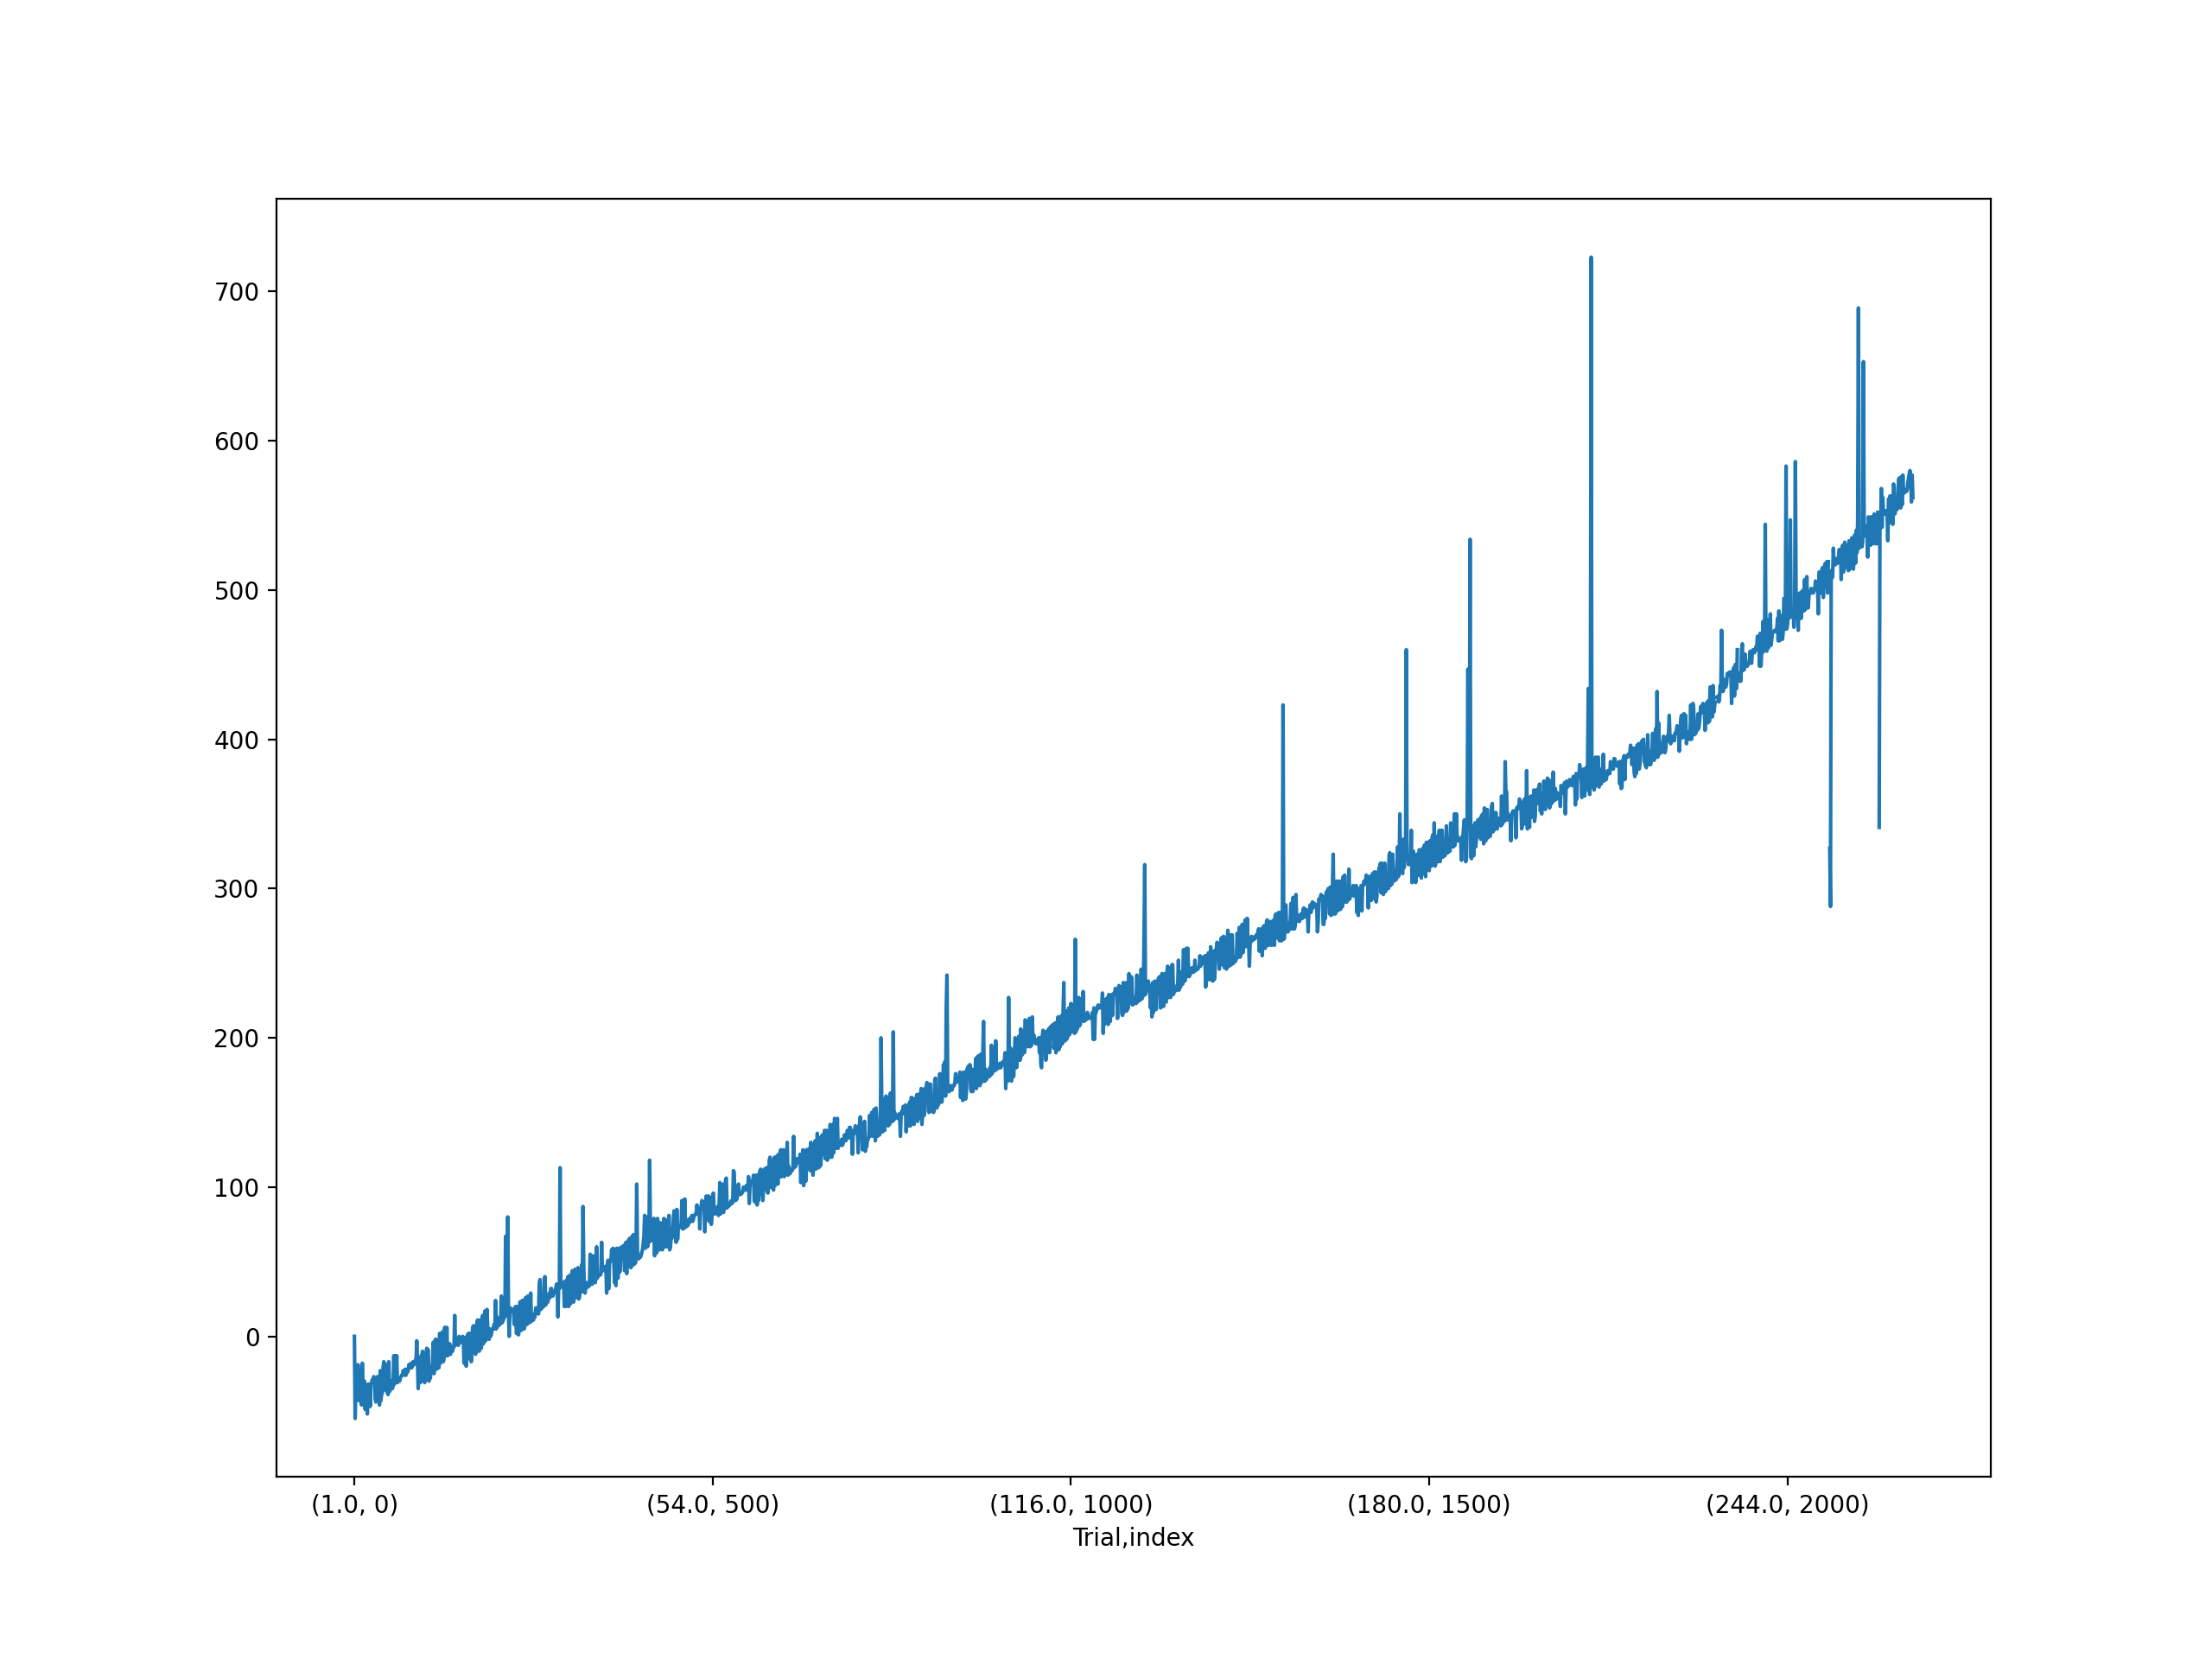

<AxesSubplot:xlabel='Trial,index'>

In [17]:
combined['Delta (TTL-CSV)'].plot()

In [18]:
combined.iloc[1720:1730]

TTL Start  TTL Length  TTL Event  CSV Start CSV Event  \
Trial index                                                           
207.0 1720   15282526.0        75.0   openloop   15114179  openloop   
      1721   15296141.0       141.0    left_rw   15127779   left_rw   
      1722   15299954.0       208.0        iti   15131539       iti   
      1723   15320163.0       220.0        end   15151800       end   
208.0 1724   15320423.0        20.0      start   15152079     start   
      1725   15340525.0        40.0        cue   15172119       cue   
      1726   15341564.0        61.0      sound   15172860     sound   
      1727   15342248.0        76.0   openloop   15173899  openloop   
      1728   15351670.0       155.0  left_norw   15183319   left_rw   
      1729   15355445.0       200.0        iti   15187079       iti   

            CSV Probability  Compare  TTL Start norm  CSV Start norm  \
Trial index                                                            
207.0 1720            0.125     True      15098265.0        15097899   
      1721            0.125     True      15111880.0        15111499   
      1722            0.125     True      15115693.0        15115259   
      1723            0.125     True      15135902.0        15135520   
208.0 1724            0.125     True      15136162.0        15135799   
      1725            0.125     True      15156264.0        15155839   
      1726            0.125     True      15157303.0        15156580   
      1727            0.125     True      15157987.0        15157619   
      1728            0.125    False      15167409.0        15167039   
      1729            0.125     True      15171184.0        15170799   

             Delta (TTL-CSV)  
Trial index                   
207.0 1720             366.0  
      1721             381.0  
      1722             434.0  
      1723             382.0  
208.0 1724             363.0  
      1725             425.0  
      1726             723.0  
      1727             368.0  
      1728             370.0  
      1729             385.0

# Backup -> moved to sync class

In [5]:
if platform.system() == 'Linux':
    # Linux
    folder = "/home/max/ExpanDrive/Google Drive/3 Projekte/Masterarbeit Laborarbeit Neuroscience/1 Data Analysis"+'/'+session
elif platform.system() == 'Windows':
    # windows
    folder = r"C:/Users/User/Google Drive/3 Projekte/Masterarbeit Laborarbeit Neuroscience/1 Data Analysis"+ r"/" + session

In [6]:
# load neuron binary files to array
with open(folder+'/electrophysiology/digitalin.dat', 'r') as f:
    #a = np.fromfile(f, dtype=np.uint32)
    binary = np.fromfile(f, dtype=np.uint16)

## Separate in Trials

### Load Neuron Files & get TTL Signals -> moved to sync class ✔

In [7]:
# find length of ttl signal
def ttl_find_lenght(data_frame, column, zeros=False):
    # calculate length of ttl signlas for each frame
    df = data_frame
    frame = column
    change = np.where(df[frame].values[:-1] != df[frame].values[1:])[0]+1
    change = np.insert(change, 0, 0)
    values = np.empty((change.shape[0],),int)
    values[::2] = 0
    values[1::2] = 1
    output = pd.Series(values, index=change)
    diff = np.diff(output.index)
    last = df.shape[0] - output.index[-1]
    diff= np.append(diff, last)
    output_df = pd.DataFrame({'start':output.index, 'value':output.values, 'length':diff})
    if zeros:
        return output_df
    else:
        return output_df.loc[output_df['value']>0,:]

In [8]:
# get individual channels ttl signals from binary array
ttl_signal = pd.DataFrame(columns=['frame 0', 'frame 1', 'frame 2', 'frame 3', 'frame 4', 'frame 5'])
for i in range(7):
    key = 'frame '+str(i)
    ttl_signal[key]=np.bitwise_and(binary, 2^i)
ttl_signal.index.name = 'sampling rate 20kHz'

In [98]:
# calculate length of ttl signals 0 and 1 for each channel
ttl0=ttl_find_lenght(ttl_signal,'frame 0')
ttl1=ttl_find_lenght(ttl_signal, 'frame 1')
ttl2=ttl_find_lenght(ttl_signal, 'frame 2')
ttl3=ttl_find_lenght(ttl_signal, 'frame 3')
ttl4=ttl_find_lenght(ttl_signal, 'frame 4')
ttl5=ttl_find_lenght(ttl_signal, 'frame 5')
ttl6=ttl_find_lenght(ttl_signal, 'frame 6')

In [46]:
# ttl singal with behavior data should be in channel 1
ttl1.size/2

2410.5

In [32]:
sync.ttl1

AttributeError: 'Sync' object has no attribute 'ttl1'

---

### Load CSV File -> moved to sync class ✔

- load the csv file from Phenosys
- convert timestamps to ms and sampling rate
- align timestamps with Neuron Sampling Rate 
    - 
- clena up event column
- cleanup probability column

In [260]:
#load csv file
csv_file = folder+'/behavior/output.csv'
csv_file
csv = pd.read_csv(csv_file, delimiter=',', encoding='utf-16', header=0, skiprows=[1])
csv.columns=['Event Time', 'Event', 'Probability', 'side']

# get gamble side
gamble_string = csv.loc[ csv['side'].notnull(), 'side'].values[0]
if 'RIGHT' in gamble_string:
    gamble_side = 'right'
if 'LEFT' in gamble_string:
    gamble_side = 'left'
    
# drop side column
csv.drop('side', axis=1, inplace=True)

# Cleanup DateTime ===========================================
# convert to datetime format with ms
def convert_to_datetime(excel_string):
    second = (excel_string-25569)*86400.0
    return datetime.datetime.utcfromtimestamp(second)
csv['Event Time'] = csv['Event Time'].apply(convert_to_datetime)
start_dateteime = csv.loc[0, 'Event Time']
#csv['Event Time'] = csv['Event Time'].dt.time

# convert ms to sampling rate time delta
delta = csv['Event Time'] - csv.loc[0, 'Event Time']
csv.insert (1, 'Delta [20kHz]', (delta.dt.total_seconds()*20000).astype('uint64') )


# clean up proabability column ===============================

# calculate where prob changes
prob = csv.loc[csv['Probability'].notnull(),'Probability']
prob_change = np.where(prob.values[:-1] != prob.values[1:])[0]
prob_change_idx = prob.iloc[prob_change].index.values
prob_change_idx = np.append(prob_change_idx, prob.index[-1])

# find probability function
def match_probability(df, start, stop):
    if "prob75" in (df.loc[stop]['Probability']):
        df.loc[ start:stop, 'Probability' ] =0.75
    elif "prob25" in (df.loc[stop]['Probability']):
        df.loc[ start:stop, 'Probability' ] =0.25
    elif "prob12" in (df.loc[stop]['Probability']):
        df.loc[ start:stop, 'Probability' ] =0.125
        
# change 3 bins probability to number
# change first bin
start = 0
stop = prob_change_idx[0]
match_probability(csv, start, stop)
# change second bin
start = prob_change_idx[0]+1
stop = prob_change_idx[1]
match_probability(csv, start, stop)
# change third bin
start = prob_change_idx[1]+1
stop = stop = prob_change_idx[2]
match_probability(csv, start, stop)
# add probability to last rows
nan = np.where(csv['Probability'].isnull())[0]
csv.loc[nan[0]:, 'Probability'] = csv.loc[nan[0]-1, 'Probability']

In [261]:
qgrid.show_grid(csv)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [14]:
csv = sync_obj.csv.copy()
csv

,Event Time,Start,Event,Probability
0,2019-06-21 19:14:48.311002,0,start,0.75
1,2019-06-21 19:14:49.125002,16280,TIstarts,0.75
2,2019-06-21 19:14:50.163003,37040,IND-CUE_pres_start,0.75
3,2019-06-21 19:14:50.194997,37679,SOUND_start,0.75
4,2019-06-21 19:14:50.230999,38399,resp-time-window_start,0.75
...,...,...,...,...
2476,2019-06-21 19:33:22.424003,22282260,TIstarts,0.125
2477,2019-06-21 19:33:23.427003,22302320,IND-CUE_pres_start,0.125
2478,2019-06-21 19:33:23.458997,22302959,SOUND_start,0.125
2479,2019-06-21 19:33:23.493997,22303659,resp-time-window_start,0.125


In [15]:
sync_obj.ttl_event_dict.keys()

dict_keys(['start', 'cue', 'sound', 'openloop', 'right_rw', 'right_norw', 'left_rw', 'left_norw', 'no response in time', 'iti', 'end'])

In [16]:
replace = dict()
replace['TIstarts']='start'
replace['IND-CUE_pres_start']='cue'
replace['SOUND_start']='sound'
replace['resp-time-window_start']='openloop'
replace['right_rewarded']='right_rw'
replace['right_NOreward']='right_norw'
replace['left_rewarded']='left_rw'
replace['left_NOreward']='left_norw'
replace['no response in time']='no response in time'
replace['ITIstarts']='iti'
replace['ITIends']='end'

In [13]:
csv.loc[0, 'Event']
replace.keys()

AttributeError: module 'csv' has no attribute 'loc'

In [19]:
# cleanup csv envent names
csv['Event'] = csv['Event'].apply(lambda event: replace[event] if event in replace.keys() else event)

csv

,Event Time,Start,Event,Probability
0,2019-06-21 19:14:48.311002,0,start,0.75
1,2019-06-21 19:14:49.125002,16280,start,0.75
2,2019-06-21 19:14:50.163003,37040,cue,0.75
3,2019-06-21 19:14:50.194997,37679,sound,0.75
4,2019-06-21 19:14:50.230999,38399,openloop,0.75
...,...,...,...,...
2476,2019-06-21 19:33:22.424003,22282260,start,0.125
2477,2019-06-21 19:33:23.427003,22302320,cue,0.125
2478,2019-06-21 19:33:23.458997,22302959,sound,0.125
2479,2019-06-21 19:33:23.493997,22303659,openloop,0.125


In [9]:
ttl1 = sync_obj.ttl_signals['channel 1']

In [10]:
for value in sync_obj.csv['Event'].unique():
    print(value)

session start
start
cue
sound
openloop
no response in time
iti
end
right_rw
right_norw
wheel is not stopping
left_rw
left_norw
session end


In [11]:
#convert ttl durration to event
# durration dict
durr_range = dict()
durr_range['TIstart']=(11,29)
durr_range['IND-CUE_pres_start']=(31,49)
durr_range['SOUND_start']=(51,69)
durr_range['resp-time-window_start']=(71, 89)
durr_range['right_rewarded']=(91,110)
durr_range['right_Noreward']=(111,129)
durr_range['left_rewarded']=(131,149)
durr_range['left_NOreward']=(151,169)
durr_range['no response in time']=(173,186)
durr_range['ITIstarts']=(190,213)
durr_range['ITIends']=(215,245)


In [12]:
def convert_durration_to_event(durr):
    for key, (start,stop) in durr_range.items():
        if durr>=start and durr<=stop:
            return key

In [13]:
def convert_ttl_to_event(channel):
    sync_obj.ttl_signals[channel]['Event'] = sync_obj.ttl_signals[channel]['length'].apply(convert_durration_to_event)
    return sync_obj.ttl_signals[channel]

### Convert to length 

In [14]:
info_channel = 1
ttl_info_channel = convert_ttl_to_event('channel '+str(info_channel))
ttl_info_channel

KeyError: 'length'

In [17]:
# find events not encoded in ttl but in csv
not_in_ttl = csv['Event'].unique()[~np.isin(csv['Event'].unique(), ttl1['Event'].unique())]
not_in_ttl

array(['start', 'wheel is not stopping', 'end'], dtype=object)

In [63]:
# get only rows of csv which are encoding events also in ttl
csv_combined = csv.loc[ (csv['Event']!=not_in_ttl[0]) & (csv['Event']!=not_in_ttl[1]) & (csv['Event']!=not_in_ttl[2]) ]

# build data frame showing both ttl and csv events
a = {'ttl':ttl1['Event'].values,'csv':csv_combined['Event'].values}
diff = pd.DataFrame.from_dict(a, orient='index')
diff = diff.transpose()
diff['compare'] = diff['ttl']==diff['csv']

In [64]:
# shift
#inser 1902 NaN
ttl = ttl1['Event'].values
ttl = np.insert(ttl, 1900, np.nan)
ttl = np.insert(ttl, 1931, np.nan)
ttl = np.insert(ttl, 1996, np.nan)
ttl = np.insert(ttl, 2058, np.nan)
ttl = np.insert(ttl, 2127, np.nan)
a = {'ttl':ttl,'csv':csv_combined['Event'].values}
diff = pd.DataFrame.from_dict(a, orient='index')
diff = diff.transpose()
diff['compare'] = diff['ttl']==diff['csv']
qgrid.show_grid(diff)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## Align Neuron TTL and Phenosys

## Combine DataFrames

In [ ]:
session = 'JG18a_190814'
gamble_side = 'right'

# load calss and set folder depending on platform
if platform.system() == 'Linux':
    # Linux
    folder = linux_folder + '/' + session
elif platform.system() == 'Windows':
    # windows
    folder = windows_folder + r"/" + session
elif platform.system() == 'Darwin':
    folder = mac_folder + r"/" + session

In [18]:
# Function to insert row in the dataframe 
def Insert_row(row_number, df, row_value): 
    # Starting value of upper half 
    start_upper = 0
    # End value of upper half 
    end_upper = row_number 
    # Start value of lower half 
    start_lower = row_number 
    # End value of lower half 
    end_lower = df.shape[0] 
    # Create a list of upper_half index 
    upper_half = [*range(start_upper, end_upper, 1)] 
    # Create a list of lower_half index 
    lower_half = [*range(start_lower, end_lower, 1)] 
    # Increment the value of lower half by 1 
    lower_half = [x.__add__(1) for x in lower_half] 
    # Combine the two lists 
    index_ = upper_half + lower_half 
    # Update the index of the dataframe 
    df.index = index_ 
    # Insert a row at the end 
    df.loc[row_number] = row_value 
    # Sort the index labels 
    df = df.sort_index() 
    # return the dataframe 
    return df 

In [19]:
# create combined dataframe
# create ttl dataframe
ttl_combined = sync_obj.ttl_signals['channel 1'].copy()
ttl_combined.reset_index(inplace=True, drop=True)

In [20]:
# insert missing rows (from align section)
missing_rows = (1900,1931,1996,2058,2127)
for row in missing_rows:
    ttl_combined = Insert_row(row, ttl_combined, np.nan)
qgrid.show_grid(ttl_combined)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [30]:
# create combined dataframe
combined = pd.merge(ttl_combined, csv_combined, how='outer', left_index=True, right_index=True)
combined['Compare'] = combined['TTL Event']==combined['CSV Event']
combined['TTL Start norm'] = combined['TTL Start']-combined.loc[0, 'TTL Start']
combined['CSV Start norm'] = combined['CSV Start']-combined.loc[0, 'CSV Start']
combined['Delta (TTL-CSV)'] = combined['TTL Start norm']-combined['CSV Start norm']

qgrid.show_grid(combined)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [27]:
# create one big DataFrame with second level column indexing
ttl_combined.columns=(['TTL Start', 'TTL Length', 'TTL Event'])
csv=sync_obj.csv
ttl1=sync_obj.ttl_info_channel
# create sub dataframe of csv with only events that are encoded in ttl 
not_in_ttl = csv['Event'].unique()[~np.isin(csv['Event'].unique(), ttl1['Event'].unique())]
csv_combined = csv.loc[ (csv['Event']!=not_in_ttl[0]) & (csv['Event']!=not_in_ttl[1]) & (csv['Event']!=not_in_ttl[2]) ].copy()
csv_combined.drop('Event Time', axis=1, inplace=True)
csv_combined.columns=(['CSV Start', 'CSV Event', 'CSV Probability'])
csv_combined.reset_index(inplace=True, drop=True)
#csv_combined.drop('index', axis=1, inplace=True)


In [28]:
ttl_combined

,TTL Start,TTL Length,TTL Event
0,184261.0,17.0,start
1,204966.0,39.0,cue
2,205627.0,61.0,sound
3,206346.0,80.0,openloop
4,346501.0,178.0,no response in time
...,...,...,...
2171,22450560.0,216.0,end
2172,22450817.0,21.0,start
2173,22470860.0,37.0,cue
2174,22471517.0,61.0,sound


In [29]:
csv_combined

,CSV Start,CSV Event,CSV Probability
0,16280,start,0.75
1,37040,cue,0.75
2,37679,sound,0.75
3,38399,openloop,0.75
4,178559,no response in time,0.75
...,...,...,...
2171,22281999,end,0.125
2172,22282260,start,0.125
2173,22302320,cue,0.125
2174,22302959,sound,0.125


In [51]:
combined

source          ttl                                      csv  \
type          Start Length                   Event     Start   
0            184261     17                TIstarts     16280   
1            204966     39      IND-CUE_pres_start     37040   
2            205627     61             SOUND_start     37679   
3            206346     80  resp-time-window_start     38399   
4            346501    178     no response in time    178559   
...             ...    ...                     ...       ...   
2171    2.24506e+07    216                 ITIends  22281999   
2172    2.24508e+07     21                TIstarts  22282260   
2173    2.24709e+07     37      IND-CUE_pres_start  22302320   
2174    2.24715e+07     61             SOUND_start  22302959   
2175    2.24722e+07     76  resp-time-window_start  22303659   

source                                      
type                     Event Probability  
0                     TIstarts        0.75  
1           IND-CUE_pres_start        0.75  
2                  SOUND_start        0.75  
3       resp-time-window_start        0.75  
4          no response in time        0.75  
...                        ...         ...  
2171                   ITIends       0.125  
2172                  TIstarts       0.125  
2173        IND-CUE_pres_start       0.125  
2174               SOUND_start       0.125  
2175    resp-time-window_start       0.125  

[2176 rows x 6 columns]

In [48]:
# merge both dfs
#combined = pd.merge(ttl_combined, csv_combined, how='outer', right_index=True, left_index=True)
combined = pd.concat([ttl_combined, csv_combined], axis=1)
#qgrid.show_grid(combined)

In [36]:
# create sub dataframe of csv with only events that are encoded in ttl 
not_in_ttl = csv['Event'].unique()[~np.isin(csv['Event'].unique(), ttl1['Event'].unique())]
csv_combined = csv.loc[ (csv['Event']!=not_in_ttl[0]) & (csv['Event']!=not_in_ttl[1]) & (csv['Event']!=not_in_ttl[2]) ].copy()
csv_combined.drop('Event Time', axis=1, inplace=True)
# prepare csv df
csv_combined_columns = csv_combined.columns
columns = pd.MultiIndex.from_product([['csv'], csv_combined_columns],
                                     names=['source', 'type'])
csv_combined

source       csv                                    
type       Start                   Event Probability
0          16280                TIstarts        0.75
1          37040      IND-CUE_pres_start        0.75
2          37679             SOUND_start        0.75
3          38399  resp-time-window_start        0.75
4         178559     no response in time        0.75
...          ...                     ...         ...
2171    22281999                 ITIends       0.125
2172    22282260                TIstarts       0.125
2173    22302320      IND-CUE_pres_start       0.125
2174    22302959             SOUND_start       0.125
2175    22303659  resp-time-window_start       0.125

[2176 rows x 3 columns]

In [32]:
# create one big DataFrame with second level column indexing
# create colum index

ttl_combined_columns = ttl_combined.columns
columns = pd.MultiIndex.from_product([['ttl'], ttl_combined_columns],
                                     names=['source', 'type'])
ttl_combined = pd.DataFrame(ttl_combined.values, columns=columns)
ttl_combined

source          ttl                               
type          Start Length                   Event
0            184261     17                TIstarts
1            204966     39      IND-CUE_pres_start
2            205627     61             SOUND_start
3            206346     80  resp-time-window_start
4            346501    178     no response in time
...             ...    ...                     ...
2171    2.24506e+07    216                 ITIends
2172    2.24508e+07     21                TIstarts
2173    2.24709e+07     37      IND-CUE_pres_start
2174    2.24715e+07     61             SOUND_start
2175    2.24722e+07     76  resp-time-window_start

[2176 rows x 3 columns]

In [ ]:
combined = sync_obj.combine_dataframes(missing_rows, 'channel 1')
qgrid.show_grid(combined)

In [27]:
# create trial index
combined = sync_obj.combine_dataframes(missing_rows, 'channel 1')

combined['index']=combined.index
combined['Trial']=np.nan
trial=1
for index, row in combined.iterrows():
    l1 = ['start', 'cue', 'sound', 'openloop']
    l2 = ['iti', 'end']
    if (row['CSV Event'] == 'start') & ( list(combined.loc[index:(index+3)]['CSV Event'].values)==l1 )  & ( list(combined.loc[(index+5):(index+6)]['CSV Event'].values)==l2 ):
        combined.loc[index:(index+6),'Trial']=trial
        trial+=1
    else:
        row['Trial']=np.nan
combined.set_index(['Trial', 'index'], inplace=True)

combined.set_index((combined.groupby(level=0).cumcount()).rename('Group Index'), append=True, inplace=True)

qgrid.show_grid(combined)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [23]:
# create new dataframe with times, event and triat
trials = combined.loc[~np.isnan(combined.index.get_level_values('Trial')),['TTL Start', 'CSV Event']]
trials.columns = ['Start', 'Event']
trials = trials.set_index((trials.groupby(level=0).cumcount()).rename('Group Index'), append=True)
qgrid.show_grid(trials)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [33]:
#ttl = np.insert(ttl, 1900, np.nan) tistart
#ttl = np.insert(ttl, 1931, np.nan) tistart
#ttl = np.insert(ttl, 1996, np.nan) tistart
#ttl = np.insert(ttl, 2058, np.nan) no response in time
#ttl = np.insert(ttl, 2127, np.nan) no response in time